In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Loading Data 

In [4]:
df = pd.read_csv('../data/df_clean_data.csv')
df.head()

,total_text,subreddit,target
0,"Hey There, Masa.",NYYankees,1
1,"Hey There, Masa [deleted]",NYYankees,1
2,1 more day until opening night!!!,NYYankees,1
3,Yankees clock in a few times in these predicti...,NYYankees,1
4,Tanaka on Instagram,NYYankees,1


# Baseline Model

In [5]:
X = df['total_text']
y = df['target']

In [6]:
y.value_counts(normalize=True)

0    0.779734
1    0.220266
Name: target, dtype: float64

The baseline accuracy of the model is 77.97%. The model needs to be this accuracy to be consider a good model.

# Count Vectorizing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                 random_state=42, 
                                                 stratify=y)

In [13]:
cvec = CountVectorizer(
    ngram_range = (1,3),
    stop_words = 'english',
    max_features = 5_000
)

In [14]:
X_train_cvec = cvec.fit_transform(X_train)

X_test_cvec = cvec.transform(X_test)

# Random forrest 

In [15]:
rf = RandomForestClassifier(random_state=42)

In [16]:
params = {
    'max_depth': [3,4,5,6,7],
    'max_features':[None, 'auto'],
    'n_estimators': [100, 500, 1000]
}

gs= GridSearchCV(rf,param_grid=params)
gs.fit(X_train_cvec, y_train)
print(gs.best_score_)
gs.best_params_

0.8589495623032803


{'max_depth': 7, 'max_features': None, 'n_estimators': 100}

In [18]:
gs.score(X_train_cvec,y_train)

0.8612495208892296

In [19]:
gs.score(X_test_cvec, y_test)

0.8627479160678356

# Confusion Matrix

In [25]:
preds = gs.predict(X_test_cvec)

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

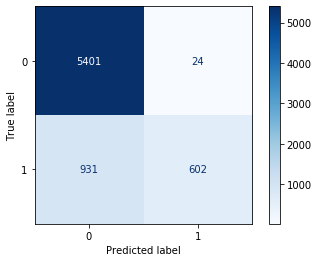

In [24]:
plot_confusion_matrix(gs, X_test_cvec, y_test, cmap='Blues', values_format='d');

## Accuracy
What percentage of observations are correctly predicted.

In [29]:
accuracy = (tp + tn) / (tp+fp+tn+fn)
print(f'The accuracy of the model is {round(accuracy,4)*100}%') 

The accuracy of the model is 86.27%


## Misclassification Rate
The percantage of observations that are incorrectly predicted.

In [30]:
print(f'The misclassication rate of the model is {round(1- accuracy,4)*100}%') 

The misclassication rate of the model is 13.73%


## Sensititivity
True postive rate.

In [38]:
sens = tp / (tp+fn)
sens
print(f'The true positive rate of the model is {round(sens,4)*100}%') 

The true positive rate of the model is 39.269999999999996%


## Specificity
True Negative rate

In [41]:
spec = tn /(tn+fp)
print(f'The true negative rate of the model is {round(spec,4)*100}%')

The true negative rate of the model is 99.56%


## Precision
Positive Predictive Value 

In [45]:
prec = tp /(tp + fp)
print(f'The precision if the model is {round(prec,4)*100}%')

The precision if the model is 96.17%
